# Análise e Previsão de Séries Temporais

## Aula 01: Série Temporal

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
url = "https://raw.githubusercontent.com/Brunomatarucco/bootcamp_data_science_alura/main/Modulo_04/dados_tuberculose.csv"

dados = pd.read_csv(url, encoding="ISO-8859-1", sep =";",
                    skiprows = 3, skipfooter = 17, engine = "python")

In [ ]:
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [ ]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844,85452
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005


### Desafio 01 e 02: transformar os dados em uma série temporal Ano-Mês

In [ ]:
dados.columns = ['year', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',
       'Ago', 'Set', 'Out', 'Nov', 'Dez', 'Total']
dados.set_index(dados.columns[0], inplace = True)
dados.drop("Total", axis = 1, inplace = True)

In [ ]:
dicionario_meses = {'Jan':1, 
                     'Fev':2,
                     'Mar':3,
                     'Abr':4,
                     'Mai':5,
                     'Jun':6,
                     'Jul':7,
                     'Ago':8,
                     'Set':9,
                     'Out':10,
                     'Nov':11,
                     'Dez':12}

In [ ]:
dados.rename(columns=dicionario_meses, inplace = True)
dados.reset_index(inplace = True)

In [ ]:
dados_melted = pd.melt(dados, id_vars=["year"],
                       value_vars= dados.columns[1:], 
                       var_name="month")

In [ ]:
dados_melted['month'] = dados_melted.month.astype("int64")
dados_melted["data"] = pd.to_datetime(dados_melted[['year', 'month']].assign(DAY=1))


In [ ]:
dados_melted.set_index('data', inplace= True)
dados_melted.reset_index(inplace = True)

In [ ]:
dados_melted.drop(["year","month"], axis = 1, inplace = True)

In [ ]:
dados_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    228 non-null    datetime64[ns]
 1   value   228 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


In [ ]:
dados_st = dados_melted.copy()
dados_st.columns = ["data", "casos"]
dados_st.head()

,data,casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432


In [ ]:
# Continuação da aula \/

In [ ]:
sns.set_theme(style = 'darkgrid')

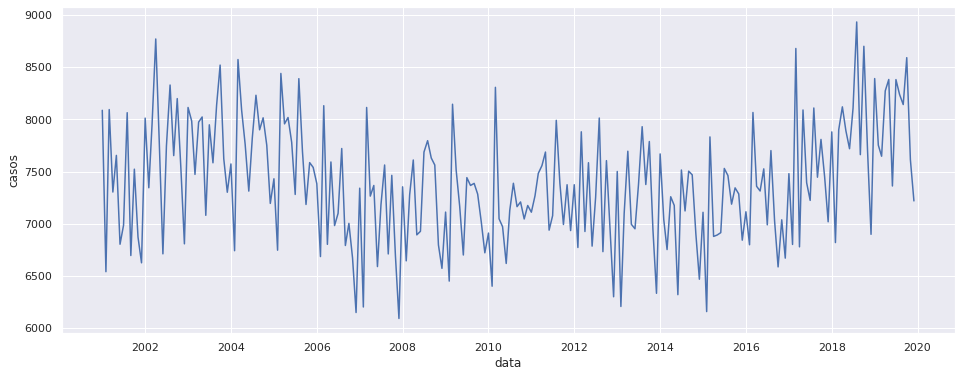

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data = dados_st, x = 'data', y = 'casos')
plt.show()

## Aula 02: Manipulação de datas

### Desafio 03: Faça a mesma transformação realizada em aula nas datas para a base de dados de Hanseníase.

In [ ]:
url_1 = "https://raw.githubusercontent.com/Brunomatarucco/bootcamp_data_science_alura/main/Modulo_04/dados_hanseniase.csv"

dados_han = pd.read_csv(url_1, encoding = "ISO-8859-1", engine = "python", 
                        sep=";",skiprows = 3, skipfooter = 11)

dados_han.head(27)

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28,8,12,14,14,17,17,14,12,23,21,21,201
1,1975,-,1,-,-,-,-,-,-,-,-,-,1,2
2,1976,-,-,-,2,1,2,-,-,2,-,1,-,8
3,1977,2,-,-,1,-,-,-,-,-,1,1,-,5
4,1978,-,-,-,-,-,2,1,2,-,1,-,-,6
5,1979,2,1,1,-,-,1,3,3,2,3,-,-,16
6,1980,2,-,3,2,-,1,-,1,2,1,2,-,14
7,1981,2,2,1,1,1,2,-,-,1,3,-,-,13
8,1982,2,-,-,1,2,1,-,-,-,1,-,1,8
9,1983,4,-,4,-,1,-,-,2,2,1,1,2,17


In [ ]:
dados_han = dados_han[27:].copy()

In [ ]:
dados_han.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
41,2015,2729,2969,3476,2930,3017,2969,3018,3244,3241,3075,2819,2412,35899
42,2016,2393,2540,3000,2702,2616,2957,2603,3113,2881,2644,2528,2213,32190
43,2017,2585,2718,3162,2557,3243,2806,2739,3288,2856,3275,2961,2448,34638
44,2018,2971,2877,3276,3157,3237,2913,2976,3644,3274,3423,2909,2268,36925
45,2019,3105,3319,2804,3037,3047,2567,2856,3107,3060,3137,2715,1886,34640


In [ ]:
dados_han.drop("Total", axis = 1, inplace = True)

In [ ]:
dados_han.columns = ['year', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',
                     'Ago', 'Set', 'Out', 'Nov', 'Dez']
dados_han.rename(columns=dicionario_meses, inplace=True)

In [ ]:
dados_han_st = pd.melt(dados_han, id_vars= "year", value_vars=dados_han.columns[1:], 
                       var_name= "month", value_name="casos")
dados_han_st

,year,month,casos
0,2001,1,4107
1,2002,1,3982
2,2003,1,4127
3,2004,1,4168
4,2005,1,4078
...,...,...,...
223,2015,12,2412
224,2016,12,2213
225,2017,12,2448
226,2018,12,2268


In [ ]:
dados_han_st = dados_han_st.astype("int64")

In [ ]:
dados_han_st["data"] = pd.to_datetime(dados_han_st[["year","month"]].assign(day=1))

In [ ]:
dados_han_st = dados_han_st[["data","casos"]].copy()

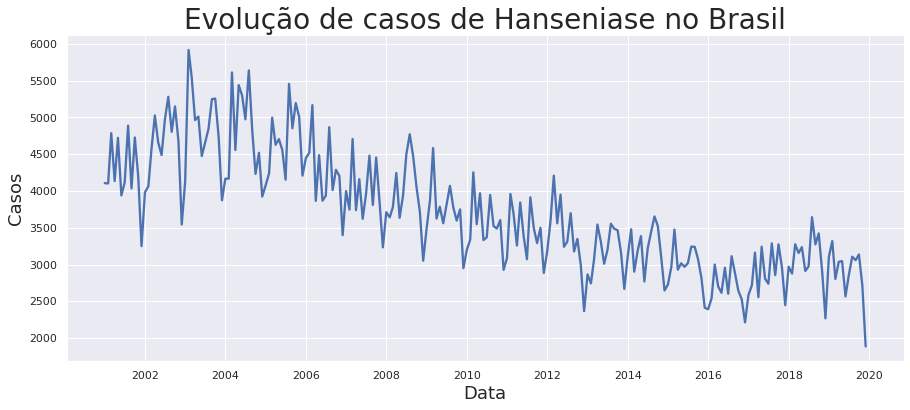

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = dados_han_st, x = "data", y = "casos", linewidth = 2.3)
ax.set_ylabel("Casos", fontsize = 18)
ax.set_xlabel("Data", fontsize = 18)
ax.set_title("Evolução de casos de Hanseniase no Brasil", fontsize = 28)

plt.show()

### Desafio 04: Configurar o gráfico de número de casos para deixá-lo mais elegante, analisar junto com um gráfico dos dados de hanseníase e compartilhar no discord suas hipóteses (deixar o gráfico bonitão).

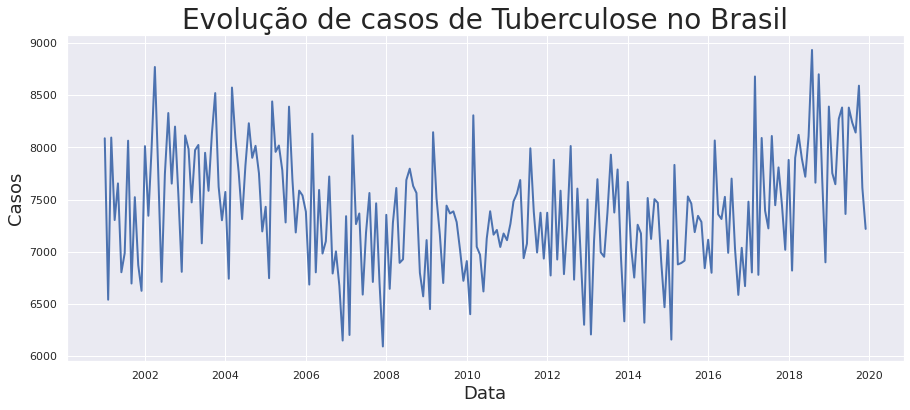

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
ax.set_ylabel("Casos", fontsize = 18)
ax.set_xlabel("Data", fontsize = 18)
ax.set_title("Evolução de casos de Tuberculose no Brasil", fontsize = 28)

plt.show()

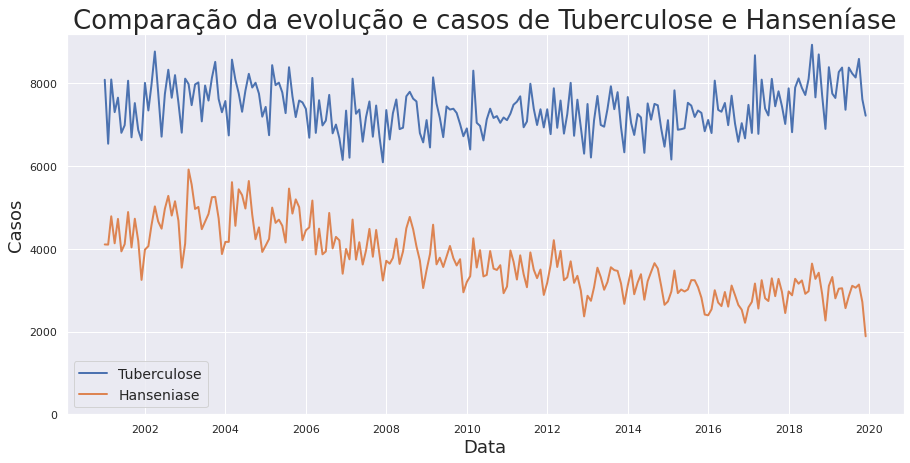

In [ ]:
plt.figure(figsize = (15,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_han_st, x = "data", y = "casos", linewidth = 2)

plt.ylim(0,9200)
plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Hanseníase", fontsize = 26)
plt.legend(("Tuberculose","Hanseniase"), fontsize = 14)
plt.show()


## Aula 03: Iniciando a Análise de Série Temporal

In [ ]:
dados_st['casos'].rolling(3).mean()

0              NaN
1              NaN
2      8072.000000
3      7900.666667
4      7707.000000
          ...     
223    6549.666667
224    6662.000000
225    6845.333333
226    6864.000000
227    7046.666667
Name: casos, Length: 228, dtype: float64

In [ ]:
dados_st.sort_values("data",inplace = True)

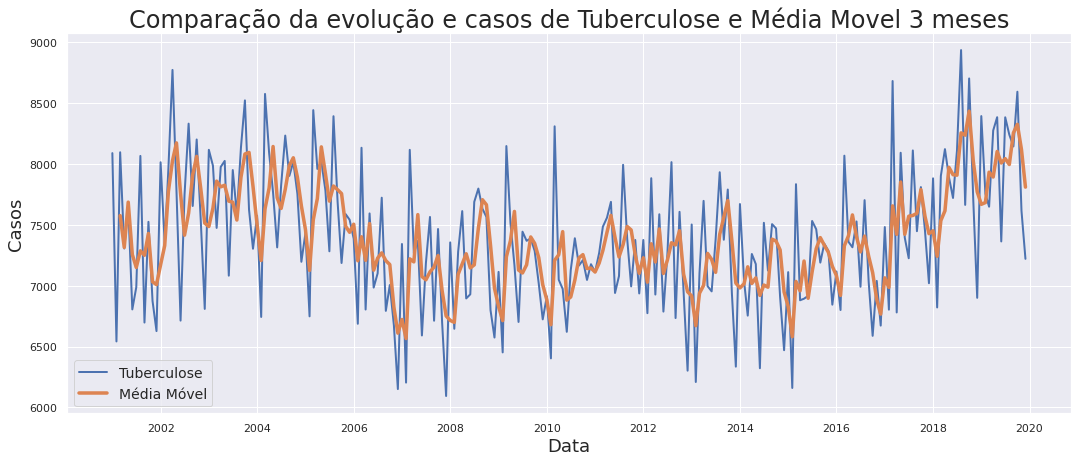

In [ ]:
dados_st['media_movel_3'] = dados_st['casos'].rolling(3).mean()

plt.figure(figsize = (18,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 3 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel"), fontsize = 14)
plt.show()

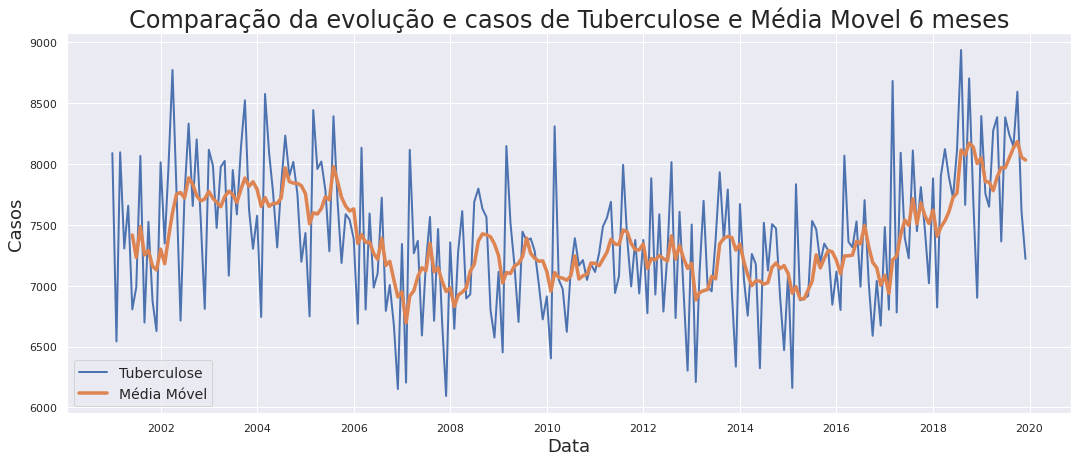

In [ ]:
dados_st['media_movel_6'] = dados_st['casos'].rolling(6).mean()

plt.figure(figsize = (18,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_6", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 6 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel"), fontsize = 14)
plt.show()

In [ ]:
dados_st.reset_index(drop=True, inplace = True)

In [ ]:
dados_st

,data,casos,media_movel_3,media_movel_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN
3,2001-04-01,7305,7314.000000,NaN
4,2001-05-01,7656,7685.333333,NaN
...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667
224,2019-09-01,8143,8254.666667,8130.666667
225,2019-10-01,8592,8324.666667,8183.666667
226,2019-11-01,7615,8116.666667,8055.666667


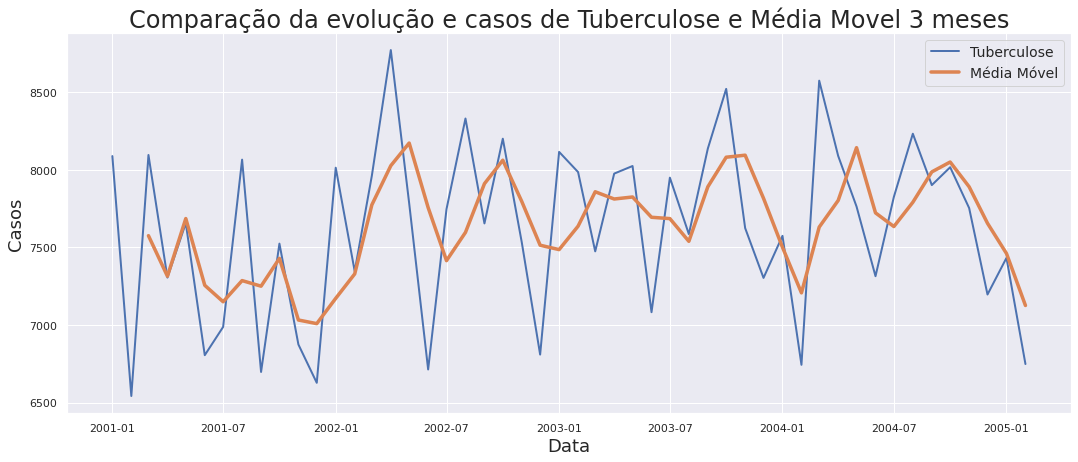

In [ ]:
plt.figure(figsize = (18,7))

sns.lineplot(data = dados_st[:50], x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st[:50], x = "data", y = "media_movel_3", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 3 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel"), fontsize = 14)
plt.show()

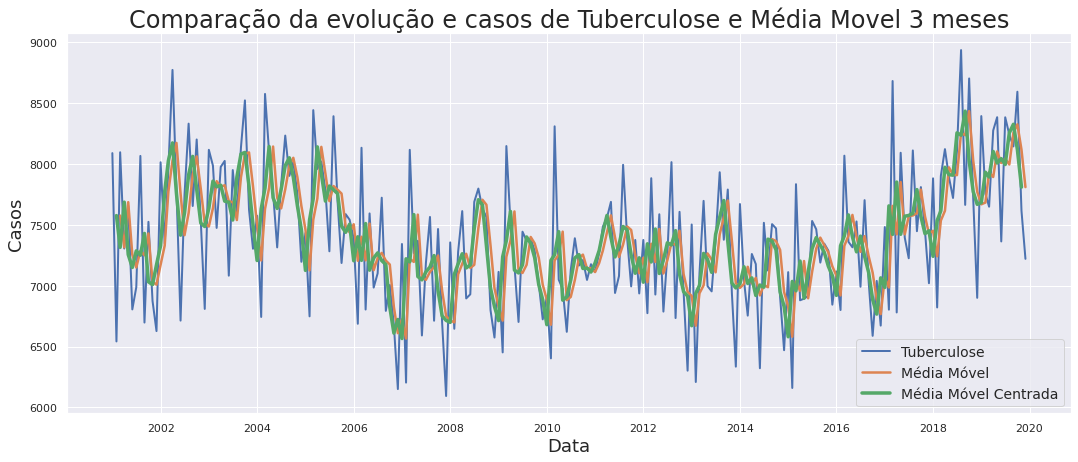

In [ ]:
plt.figure(figsize = (18,7))

dados_st['media_movel_3c'] = dados_st['casos'].rolling(3, center = True).mean()
dados_st['media_movel_6c'] = dados_st['casos'].rolling(6, center = True).mean()


sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3", linewidth = 2.5)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3c", linewidth = 3.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução e casos de Tuberculose e Média Movel 3 meses", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel","Média Móvel Centrada"), fontsize = 14)
plt.show()

### Desafio 05 - Analisar outras janelas de médias móveis, realizar a análise dessas janelas e compartilhar suas conclusões no Discord. Refletir sobre os impactos de uma suavização com janelas muito grandes.  

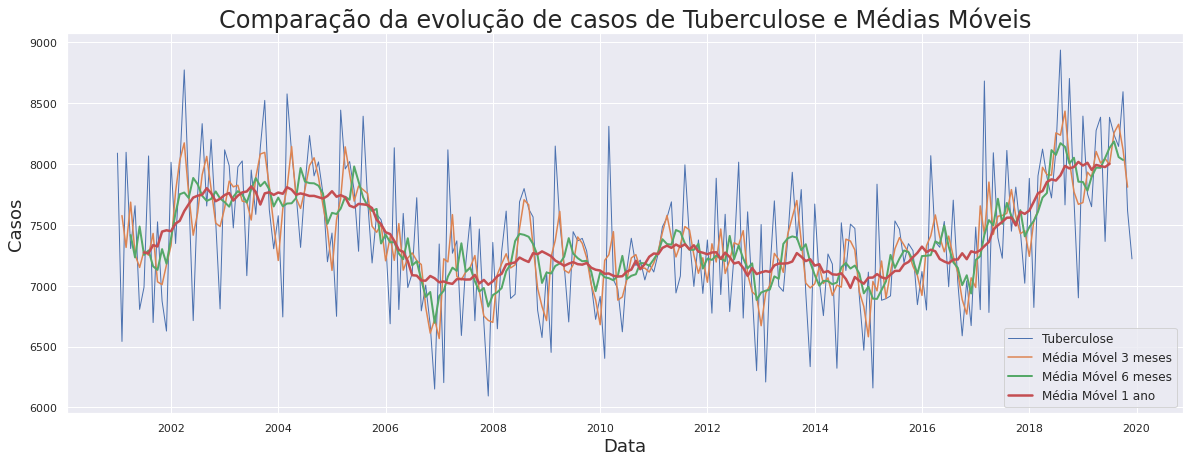

In [ ]:
dados_st['media_movel_12c'] = dados_st['casos'].rolling(12, center = True).mean()

plt.figure(figsize = (20,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 1)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3c", linewidth = 1.5)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_6c", linewidth = 2)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_12c", linewidth = 2.5)

plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução de casos de Tuberculose e Médias Móveis", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel 3 meses","Média Móvel 6 meses", "Média Móvel 1 ano"), fontsize = 12)
plt.show()

Quanto mais meses são colocados no rolling, mais suavizadas são as curvas. Até certo ponto existe uma vantagem de se suavizar uma curva pois facilita a compreensão de uma tendência geral. Porém, ao se suavizar demais, perde-se a granularidade e a especificadade dos dados. Segue abaixo um exemplo:

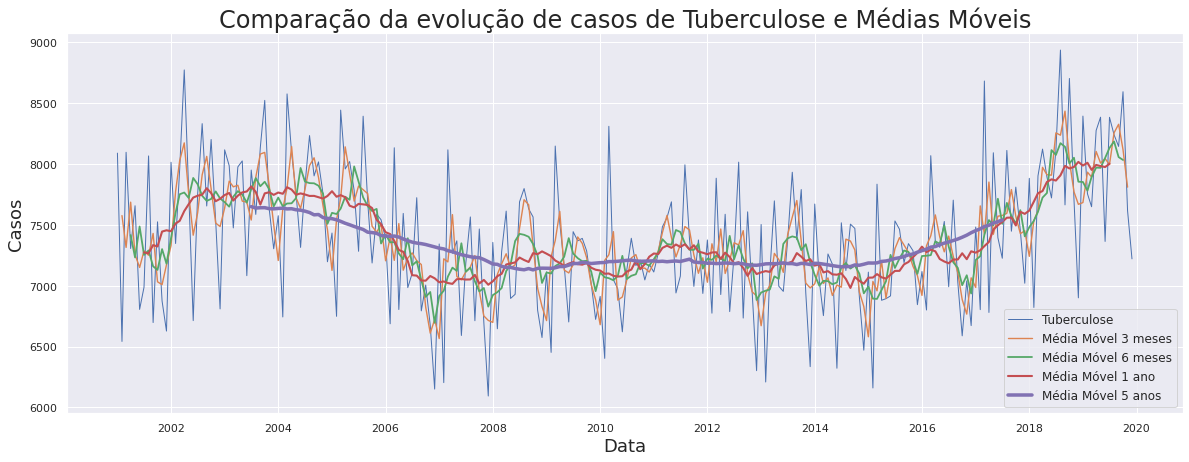

In [ ]:
dados_st['media_movel_60c'] = dados_st['casos'].rolling(60, center = True).mean()

plt.figure(figsize = (20,7))

sns.lineplot(data = dados_st, x = "data", y = "casos", linewidth = 1)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_3c", linewidth = 1.4)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_6c", linewidth = 1.8)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_12c", linewidth = 2.1)
sns.lineplot(data = dados_st, x = "data", y = "media_movel_60c", linewidth = 3.5)


plt.xlabel("Data", fontsize = 18)
plt.ylabel("Casos", fontsize = 18)
plt.title("Comparação da evolução de casos de Tuberculose e Médias Móveis", fontsize = 24)
plt.legend(("Tuberculose","Média Móvel 3 meses","Média Móvel 6 meses", "Média Móvel 1 ano", "Média Móvel 5 anos"), fontsize = 12)
plt.show()

Com uma média móvel de 60 meses (5 anos), só é possível verificar uma tendência muito geral em relação aos dados. Não é possível verificar como os dados através dos anos.

Se o próposito é só compreender se os casos estão crescendo ou diminuindo, esse tipo de análise é possível, porém não existe um nível de detalhes dos dados.

### Desafio 06 - Pensar em como realizar sua primeira previsão usando as médias ou qualquer outra abordagem do seu interesse.

In [ ]:
media_total = dados_st.casos.mean()

In [ ]:
media_janeiros = dados_st[dados_st['data'].dt.month == 1]['casos'].mean()

In [ ]:
media_ultimos_3_janeiros = dados_st[dados_st['data'].dt.month == 1]['casos'][-3:].mean()

In [ ]:
media_ultimos_3_meses_2019 = dados_st.casos[-3:].mean()

In [ ]:
print("Média total= {:.2f}\nMédia de todos os janeiros= {:.2f}\nMédia dos últimos 3 Janeiros= {}\nMédia dos últimos 3 meses registrados = {}"
      .format(media_total,media_janeiros,media_ultimos_3_janeiros,media_ultimos_3_meses_2019))

Média total= 7389.29
Média de todos os janeiros= 7524.68
Média dos últimos 3 Janeiros= 7918.0
Média dos últimos 3 meses registrados = 7809.0


Entre todos os dados para fazer a previsão para Janeiro de 2020 eu faria a média dos últimos 3 janeiros e a média dos últimos 3 meses registrados para tentar prever o valor. 

Assim, levo em consideração as especificidades dos últimos meses de janeiro e também os últimos registros que estão mais próximos do mês à ser previsto.

In [ ]:
print("Previsão Janeiro de 2020 = {:.2f}".format((media_ultimos_3_janeiros+media_ultimos_3_meses_2019)/2))

Previsão Janeiro de 2020 = 7863.50


## Aula 04: Decomposição e Auto Correlação

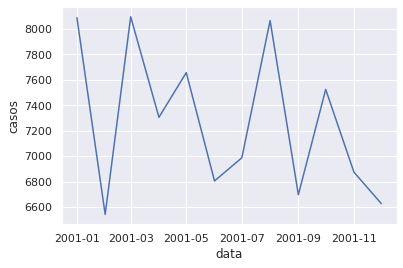

In [ ]:
sns.lineplot(x = 'data', y = 'casos', data = dados_st[:12])

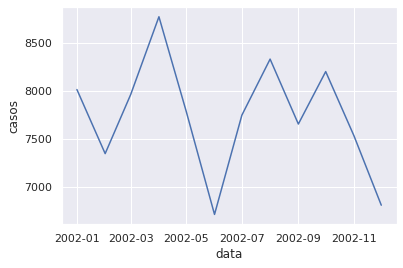

In [ ]:
sns.lineplot(x = 'data', y = 'casos', data = dados_st[12:24])

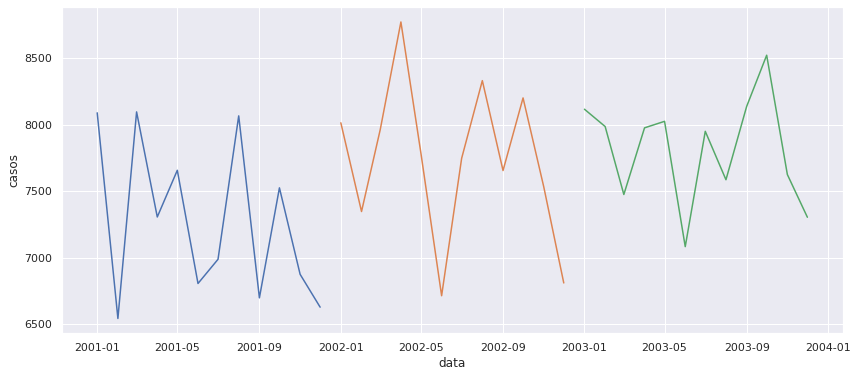

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(x = 'data', y = 'casos', data = dados_st[:12])
sns.lineplot(x = 'data', y = 'casos', data = dados_st[12:24])
sns.lineplot(x = 'data', y = 'casos', data = dados_st[24:36])

plt.show()

In [ ]:
dados_st['ano'] = dados_st.data.dt.year

In [ ]:
dados_st['mes'] = dados_st.data.dt.month

In [ ]:
len(dados_st.ano.unique())

19

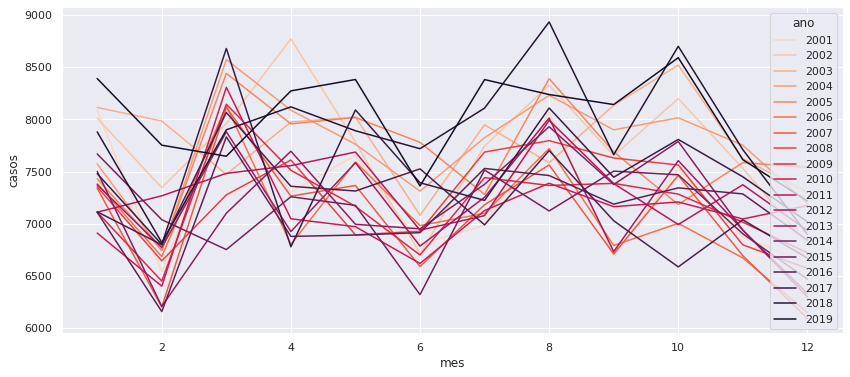

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(x = 'mes', y = 'casos', data = dados_st, hue = 'ano',
             palette = sns.color_palette('rocket_r',19))


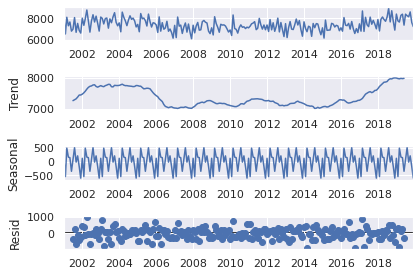

In [ ]:
decomposicao = seasonal_decompose(dados_st[['data', 'casos']].set_index("data"))
decomposicao.plot();

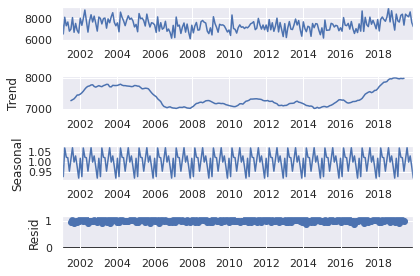

In [ ]:
decomposicao_multi = seasonal_decompose(dados_st[['data', 'casos']].set_index("data"), model='multiplicative')
decomposicao_multi.plot();

In [ ]:
url_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'

dados_passageiros = pd.read_csv(url_passageiros)

In [ ]:
dados_passageiros.columns = ['month','passengers']

In [ ]:
dados_passageiros['month'] = pd.to_datetime(dados_passageiros['month'])
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       144 non-null    datetime64[ns]
 1   passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


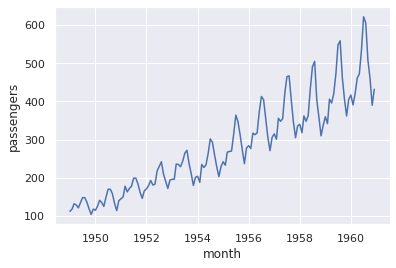

In [ ]:
sns.lineplot(x = 'month' , y= "passengers", data=dados_passageiros)

In [ ]:
decomp_passageiros = seasonal_decompose(dados_passageiros.set_index("month"))

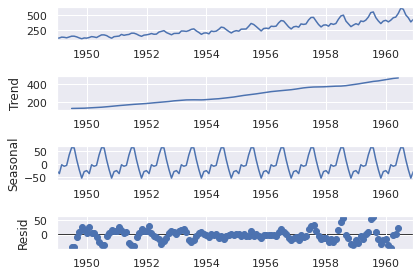

In [ ]:
decomp_passageiros.plot();

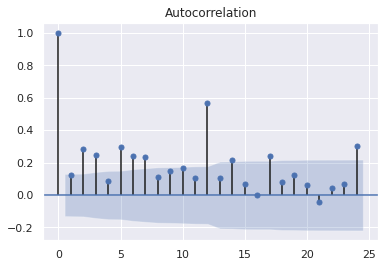

In [ ]:
plot_acf(dados_st['casos']);

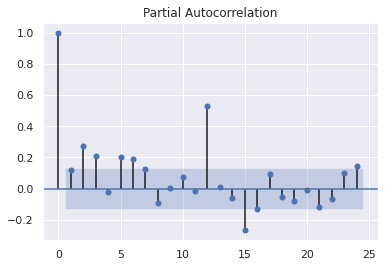

In [ ]:
plot_pacf(dados_st['casos']);

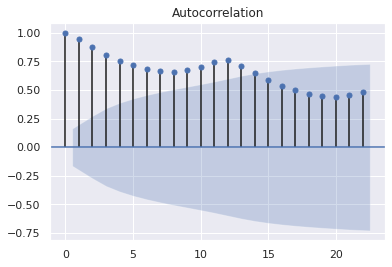

In [ ]:
plot_acf(dados_passageiros['passengers']);

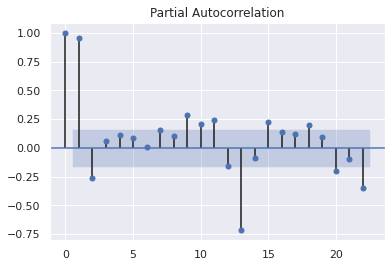

In [ ]:
plot_pacf(dados_passageiros['passengers']);

### Desafio 07 - Transformar as datas da base de dados em index e realizar os slices feitos em aulas pelas datas

In [ ]:
dados_st.set_index("data", inplace=True)

In [ ]:
dados_st.loc[dados_st.index.month==8]

,casos,media_movel_3,media_movel_6,media_movel_3c,media_movel_6c,media_movel_12c,media_movel_60c,ano,mes
data,,,,,,,,,
2001-08-01,8065,7285.666667,7485.500000,7249.666667,7289.000000,7265.833333,NaN,2001,8
2002-08-01,8330,7596.333333,7884.166667,7910.000000,7737.833333,7746.750000,NaN,2002,8
2003-08-01,7585,7538.666667,7681.500000,7890.000000,7882.833333,7769.333333,7637.166667,2003,8
2004-08-01,8232,7790.333333,7966.166667,7986.000000,7841.833333,7736.500000,7600.466667,2004,8
2005-08-01,8391,7818.000000,7978.666667,7787.666667,7724.833333,7667.416667,7461.333333,2005,8
2006-08-01,7722,7269.000000,7389.333333,7205.333333,7199.666667,7082.333333,7349.566667,2006,8
2007-08-01,7564,7113.000000,7348.000000,7153.333333,7147.333333,7051.083333,7237.550000,2007,8
2008-08-01,7797,7471.333333,7366.500000,7705.333333,7417.333333,7210.500000,7130.416667,2008,8
2009-08-01,7368,7171.000000,7390.166667,7399.666667,7225.666667,7176.416667,7181.883333,2009,8


In [ ]:
dados_st.loc[dados_st.index.year==2008]

,casos,media_movel_3,media_movel_6,media_movel_3c,media_movel_6c,media_movel_12c,media_movel_60c,ano,mes
data,,,,,,,,,
2008-01-01,7355,6714.666667,6980.833333,6698.333333,6922.166667,7035.750000,7177.666667,2008,1
2008-02-01,6646,6698.333333,6827.833333,7093.000000,6946.666667,7077.750000,7175.100000,2008,2
2008-03-01,7278,7093.000000,6922.166667,7178.666667,6980.000000,7097.166667,7158.400000,2008,3
2008-04-01,7612,7178.666667,6946.666667,7261.666667,7119.166667,7173.750000,7149.650000,2008,4
2008-05-01,6895,7261.666667,6980.000000,7145.333333,7174.666667,7182.000000,7150.050000,2008,5
2008-06-01,6929,7145.333333,7119.166667,7170.666667,7366.500000,7190.666667,7141.050000,2008,6
2008-07-01,7688,7170.666667,7174.666667,7471.333333,7425.333333,7230.666667,7134.966667,2008,7
2008-08-01,7797,7471.333333,7366.500000,7705.333333,7417.333333,7210.500000,7130.416667,2008,8
2008-09-01,7631,7705.333333,7425.333333,7664.000000,7401.333333,7194.333333,7140.116667,2008,9


### Desafio 08 - Formatar os gráficos de decomposição, colocar título e modificar os tamanhos. realizar a decomposição de outras séries temporais como a da Hanseníase.



In [ ]:
dados_han_st.sort_values("data",inplace = True)
dados_han_st.set_index("data", inplace = True)

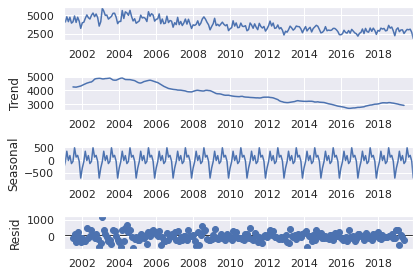

In [ ]:
decomp_han = seasonal_decompose(dados_han_st)
decomp_han.plot();

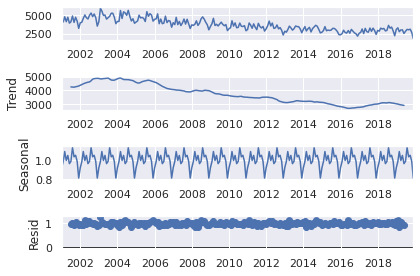

In [ ]:
decomp_han_multi = seasonal_decompose(dados_han_st, model= 'multiplicative')
decomp_han_multi.plot();

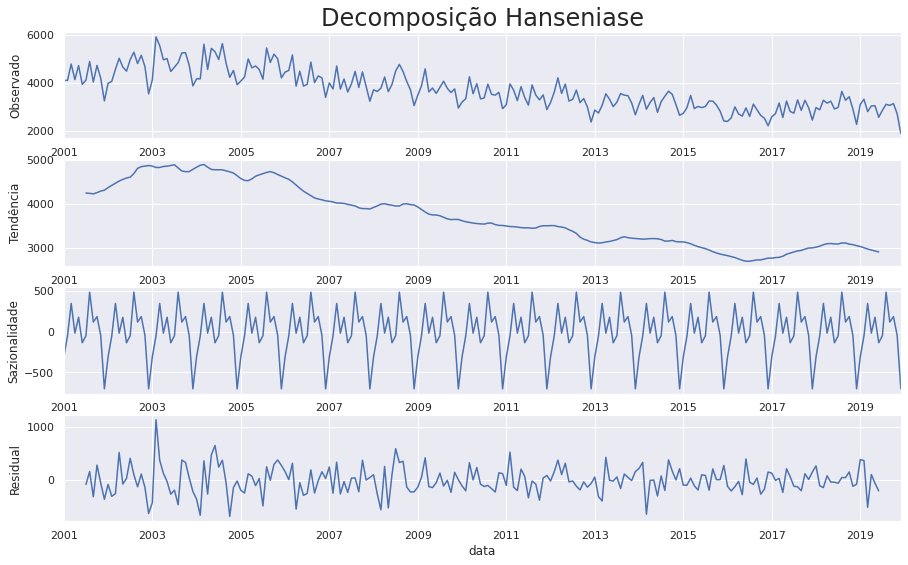

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,9))

decomp_han.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')

decomp_han.trend.plot(ax=ax2)
ax2.set_ylabel("Tendência")

decomp_han.seasonal.plot(ax=ax3)
ax3.set_ylabel("Sazionalidade")

decomp_han.resid.plot(ax=ax4)
ax4.set_ylabel("Residual")


ax1.set_title("Decomposição Hanseniase", fontsize = 24)

plt.show()

### Desafio 09 - Realizar uma análise de autocorrelação e autocorrelação parcial nos dados de Hanseníase e/ou COVID-19, interpretar e discutir no discord.

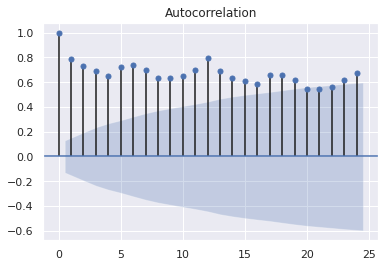

In [ ]:
plot_acf(dados_han_st['casos']);

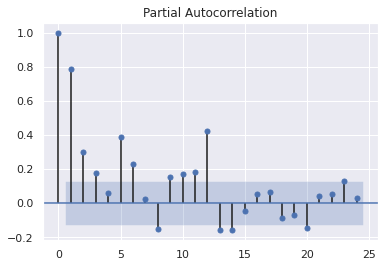

In [ ]:
plot_pacf(dados_han_st['casos']);

## Aula 05: Previsões em Séries Temporais

In [ ]:
dados_passageiros['mes'] = dados_passageiros['month'].dt.month
dados_passageiros['ano'] = dados_passageiros['month'].dt.year

In [ ]:
dados_passageiros.head()

,month,passengers,mes,ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


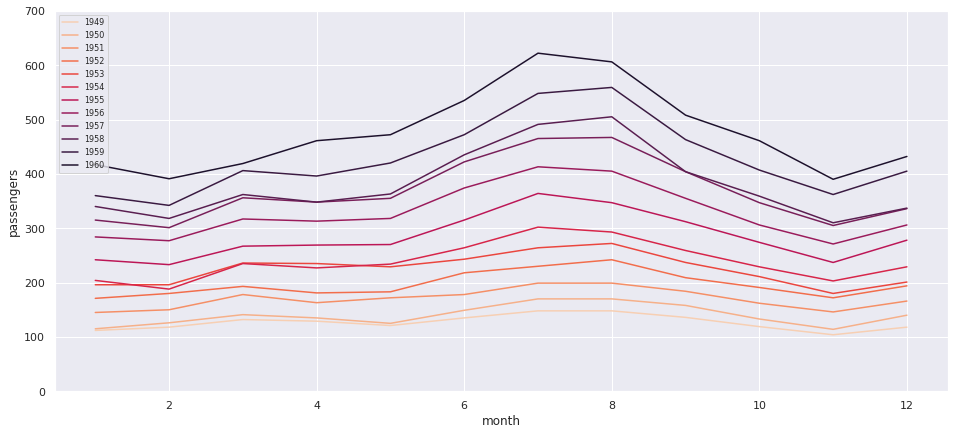

In [ ]:
plt.figure(figsize = (16,7))
sns.lineplot(x = dados_passageiros.month.dt.month,
             y = dados_passageiros.passengers, 
             hue = dados_passageiros.month.dt.year,
             palette = sns.color_palette("rocket_r", n_colors=len(dados_passageiros.ano.unique())))
plt.legend(fontsize = 8)
plt.ylim(0,700)
plt.show()

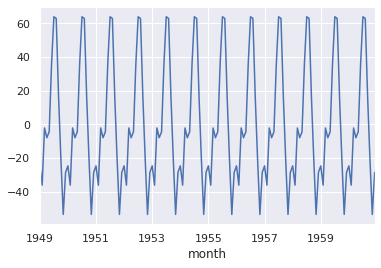

In [ ]:
decomp_passageiros.seasonal.plot()

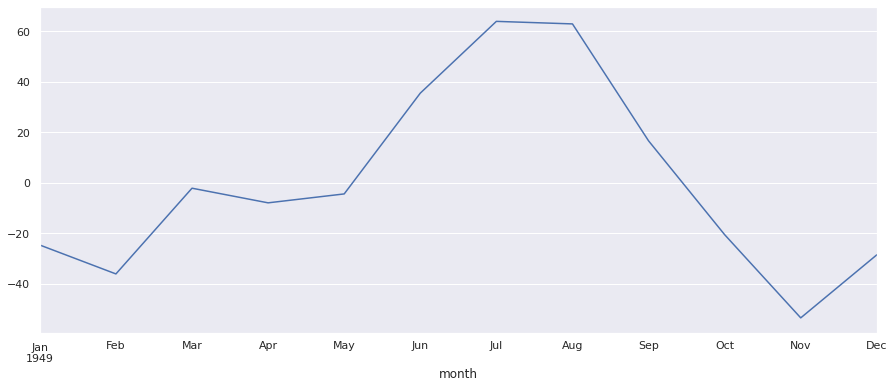

In [ ]:
decomp_passageiros.seasonal.iloc[decomp_passageiros.seasonal.index.year == 1949].plot(figsize = (15,6))

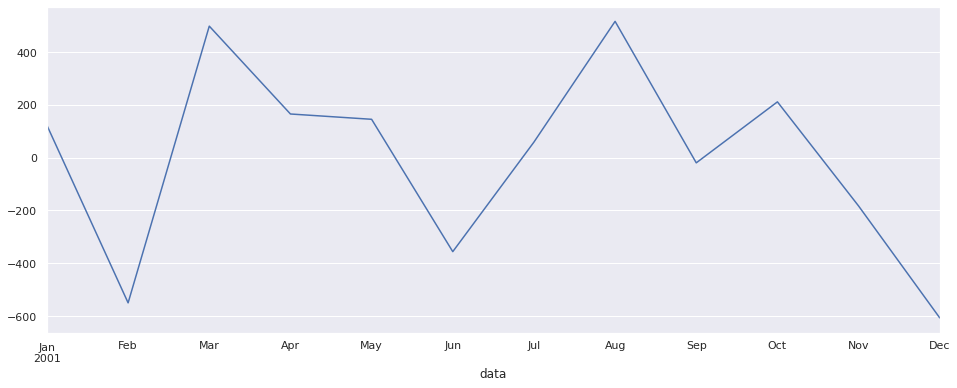

In [ ]:
decomposicao.seasonal.iloc[decomposicao.seasonal.index.year == 2001].plot(figsize = (16,6))

In [ ]:
modelo_arima = ARIMA(dados_st['casos'].values.astype("float32"), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()
modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772])

In [ ]:
dados_treino = dados_st.query("ano != 2019").copy()
dados_teste = dados_st.query("ano == 2019").copy()


modelo_arima = ARIMA(dados_treino['casos'].values.astype("float32"), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


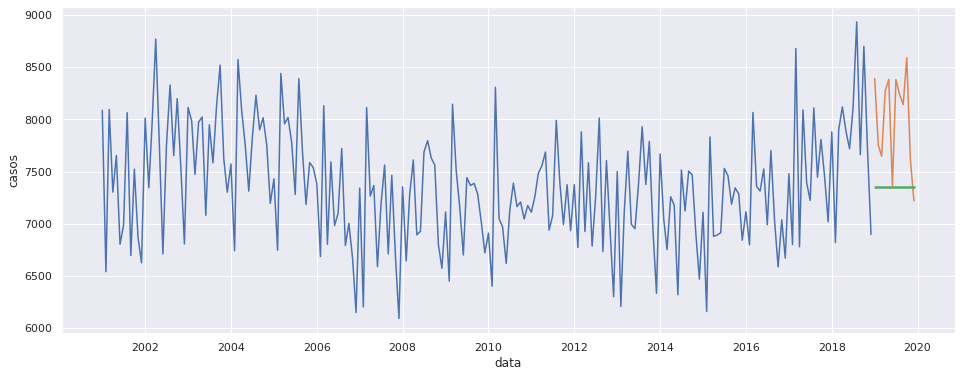

In [ ]:
plt.figure(figsize = (16,6))


dados_teste['previsao'] = previsao
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste, lw = 2.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


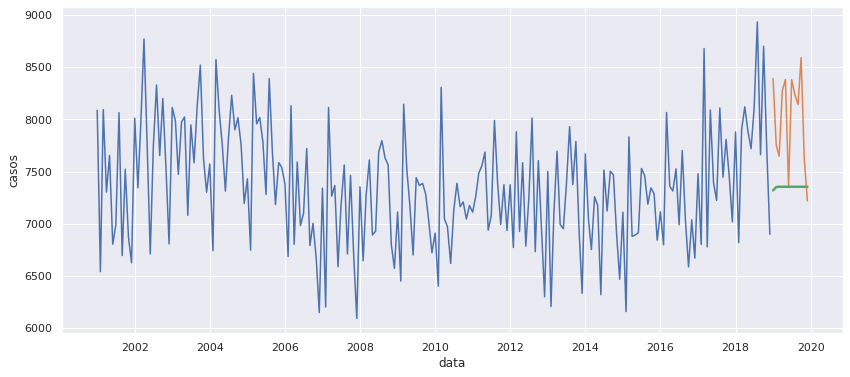

In [ ]:

modelo_arima = ARIMA(dados_treino['casos'].values.astype("float32"), order = [1,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize = (14,6))
dados_teste['previsao'] = previsao
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste, lw = 2.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


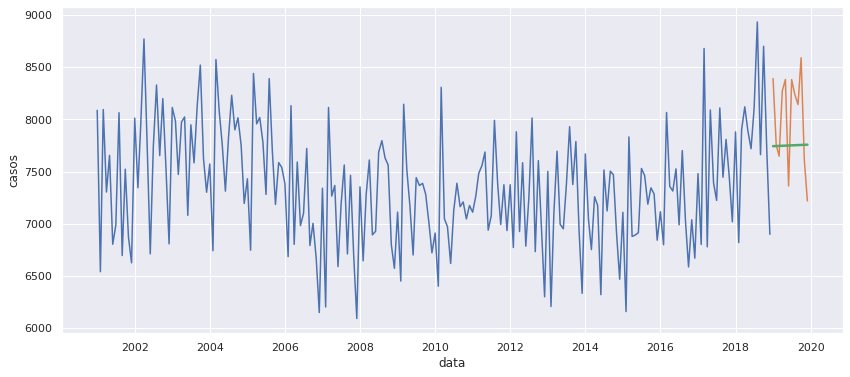

In [ ]:
modelo_arima = ARIMA(dados_treino['casos'].values.astype("float32"), order = [0,1,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize = (14,6))
dados_teste['previsao'] = previsao
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste, lw = 2.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


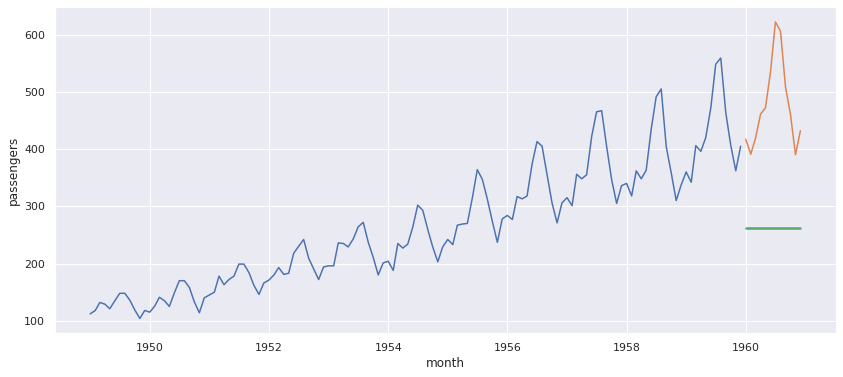

In [ ]:
dados_pass_treino = dados_passageiros.query("ano != 1960").copy()
dados_pass_teste = dados_passageiros.query("ano == 1960").copy()


modelo_arima = ARIMA(dados_pass_treino['passengers'].values.astype("float32"), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize = (14,6))
dados_pass_teste['previsao'] = previsao
sns.lineplot(x = 'month', y = 'passengers', data = dados_pass_treino)
sns.lineplot(x = 'month', y = 'passengers', data = dados_pass_teste)
sns.lineplot(x = 'month', y = 'previsao', data = dados_pass_teste, lw = 2.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

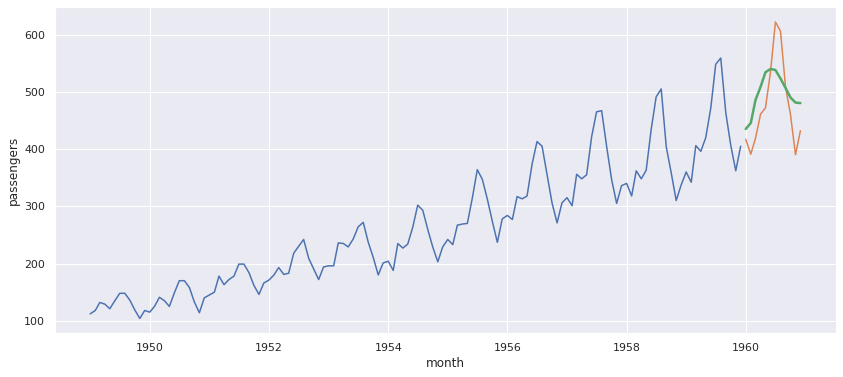

In [ ]:
modelo_arima = ARIMA(dados_pass_treino['passengers'].values.astype("float32"), order = [3,1,3])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize = (14,6))
dados_pass_teste['previsao'] = previsao
sns.lineplot(x = 'month', y = 'passengers', data = dados_pass_treino)
sns.lineplot(x = 'month', y = 'passengers', data = dados_pass_teste)
sns.lineplot(x = 'month', y = 'previsao', data = dados_pass_teste, lw = 2.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

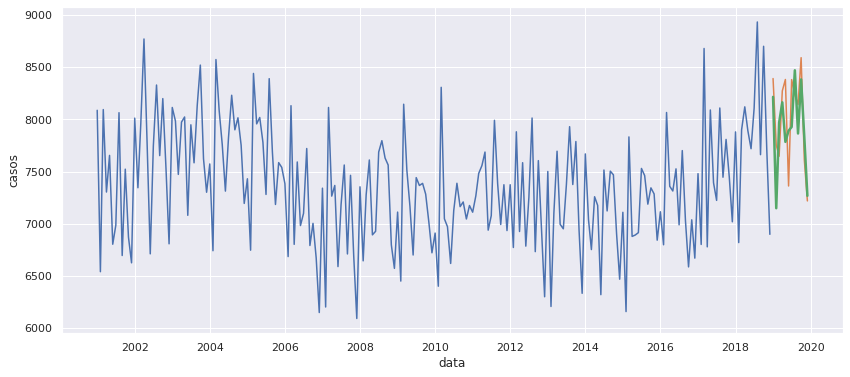

In [ ]:
dados_treino = dados_st.query("ano != 2019").copy()
dados_teste = dados_st.query("ano == 2019").copy()

modelo_arima = ARIMA(dados_treino['casos'].values.astype("float32"), order = [12,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize = (14,6))
dados_teste['previsao'] = previsao
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste, lw = 2.5)

### Desafio 09 - Tentar resolver o problema de plots de imagem antes de assistir o vídeo com a resolução


In [ ]:
# Resolvido na aula

### Desafio 10 - Na tupla de retorno do forecast, estudar na documentação o que são cada um dos elementos de retorno

In [ ]:
# O segundo array é o desvio padrão e o terceiro é o intervalo de confiança

### Desafio 11 -Utilizar o modelo ARIMA para a base de dados de passageiros e modificar o parâmetro order.

In [ ]:
# Realizado na aula

### Desafio 12 - Calcula uma série temporal diferenciada de 1 e 2 ordem e plotar os gráficos destas séries para verificar o efeito do parâmetro de diferenciação do ARIMA.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

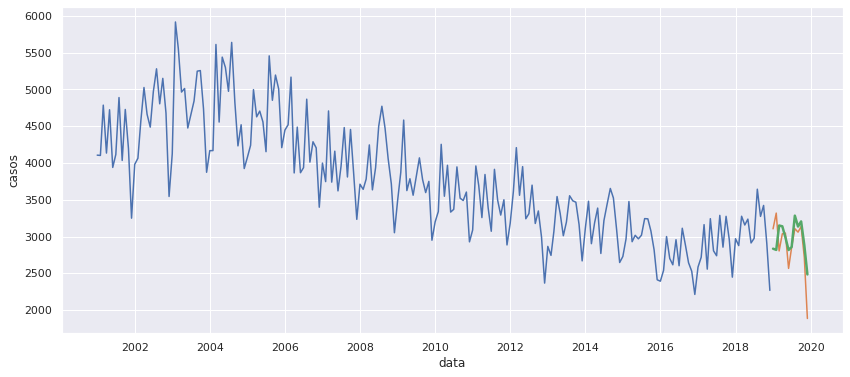

In [ ]:
dados_han_treino = dados_han_st.iloc[dados_han_st.index.year != 2019].copy()
dados_han_teste = dados_han_st.iloc[dados_han_st.index.year == 2019].copy()

modelo_arima = ARIMA(dados_han_treino['casos'].values.astype("float32"), order = [12,1,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize = (14,6))
dados_han_teste['previsao'] = previsao
sns.lineplot(x = 'data', y = 'casos', data = dados_han_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_han_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_han_teste, lw = 2.5)

## Aula 06: AUTOARIMA e Prophet

In [ ]:
#!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
modelo_autoarima = auto_arima(dados_treino['casos'].values,
                              start_p=12, max_p = 12,
                              start_q = 7, max_q = 7,
                              error_action= 'ignore',trace = True)

Performing stepwise search to minimize aic
 ARIMA(12,1,7)(0,0,0)[0] intercept   : AIC=3224.418, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3366.610, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3312.298, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3460.524, Time=0.01 sec
 ARIMA(11,1,7)(0,0,0)[0] intercept   : AIC=3227.387, Time=2.59 sec
 ARIMA(12,1,6)(0,0,0)[0] intercept   : AIC=3224.342, Time=2.74 sec
 ARIMA(11,1,6)(0,0,0)[0] intercept   : AIC=3226.094, Time=2.61 sec
 ARIMA(12,1,5)(0,0,0)[0] intercept   : AIC=3229.994, Time=2.77 sec
 ARIMA(11,1,5)(0,0,0)[0] intercept   : AIC=3224.956, Time=2.40 sec
 ARIMA(12,1,6)(0,0,0)[0]             : AIC=3222.784, Time=2.55 sec
 ARIMA(11,1,6)(0,0,0)[0]             : AIC=3224.430, Time=2.28 sec
 ARIMA(12,1,5)(0,0,0)[0]             : AIC=3228.974, Time=2.32 sec
 ARIMA(12,1,7)(0,0,0)[0]             : AIC=3222.685, Time=2.73 sec
 ARIMA(11,1,7)(0,0,0)[0

In [ ]:
previsao_autoarima = modelo_autoarima.predict(n_periods=12)

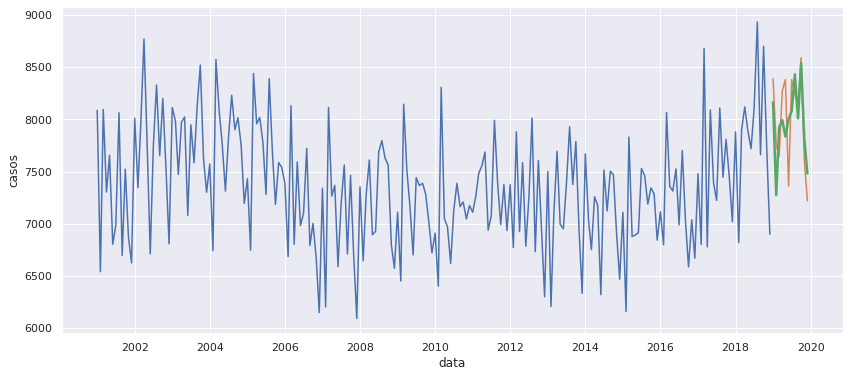

In [ ]:
# Sem inclusão de sazonalidade

plt.figure(figsize = (14,6))
dados_teste['previsao_autoarima'] = previsao_autoarima
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao_autoarima', data = dados_teste, lw = 2.5)

In [ ]:
modelo_autoarima = auto_arima(dados_treino['casos'].values,
                              seasonal = True, m = 12, 
                              start_p = 12, max_p = 13,
                              start_q = 2, max_q = 7,
                              error_action= 'ignore',trace = True)

Performing stepwise search to minimize aic
 ARIMA(11,1,2)(1,0,1)[12] intercept   : AIC=3216.383, Time=4.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(11,1,2)(0,0,1)[12] intercept   : AIC=3230.198, Time=2.74 sec
 ARIMA(11,1,2)(1,0,0)[12] intercept   : AIC=3225.087, Time=4.63 sec
 ARIMA(11,1,2)(2,0,1)[12] intercept   : AIC=3218.410, Time=10.72 sec
 ARIMA(11,1,2)(1,0,2)[12] intercept   : AIC=3217.766, Time=6.50 sec
 ARIMA(11,1,2)(0,0,0)[12] intercept   : AIC=3243.192, Time=2.11 sec
 ARIMA(11,1,2)(0,0,2)[12] intercept   : AIC=3229.558, Time=6.23 sec
 ARIMA(11,1,2)(2,0,0)[12] intercept   : AIC=3224.728, Time=10.34 sec
 ARIMA(11,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=10.89 sec
 ARIMA(10,1,2)(1,0,1)[12] intercept   : AIC=3239.962, Time=4.97 sec
 ARIMA(11,1

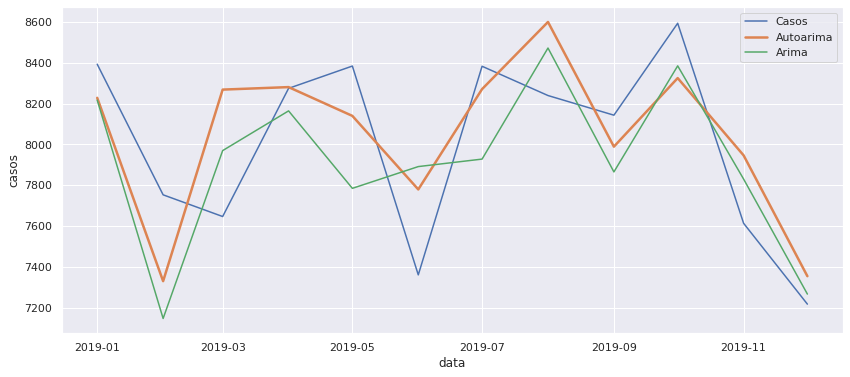

In [ ]:
previsao_autoarima = modelo_autoarima.predict(n_periods=12)
# Levando em consideração a Sazonalidade

plt.figure(figsize = (14,6))
dados_teste['previsao_autoarima'] = previsao_autoarima

sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao_autoarima', data = dados_teste, lw = 2.5)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

plt.legend(["Casos","Autoarima", "Arima"])

In [ ]:
from sklearn.metrics import mean_squared_error

resultado_autoarima = mean_squared_error(dados_teste['casos'],dados_teste['previsao_autoarima'])
resultado_arima = mean_squared_error(dados_teste['casos'],dados_teste['previsao'])

print("Autoarima = {:.2f}\nArima = {:.2f}".format(resultado_autoarima, resultado_arima))

Autoarima = 99023.54
Arima = 131384.44


In [ ]:
from fbprophet import Prophet

modelo_profeta = Prophet(seasonality_mode='multiplicative')
dados_pass_treino.rename(columns={'month':'ds','passengers':'y'}, inplace=True)
modelo_profeta_treinado = modelo_profeta.fit(dados_pass_treino[['ds','y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo_profeta_treinado.make_future_dataframe(12,freq='M')
futuro

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-07-31
140,1960-08-31
141,1960-09-30
142,1960-10-31


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,115.603966,91.225770,116.593022,115.603966,115.603966,-0.101135,-0.101135,-0.101135,-0.101135,-0.101135,-0.101135,0.0,0.0,0.0,103.912403
1,1949-02-01,117.275019,86.575705,112.348767,117.275019,117.275019,-0.154216,-0.154216,-0.154216,-0.154216,-0.154216,-0.154216,0.0,0.0,0.0,99.189377
2,1949-03-01,118.784358,106.661172,131.733303,118.784358,118.784358,0.002721,0.002721,0.002721,0.002721,0.002721,0.002721,0.0,0.0,0.0,119.107520
3,1949-04-01,120.455412,103.065947,129.823901,120.455412,120.455412,-0.033256,-0.033256,-0.033256,-0.033256,-0.033256,-0.033256,0.0,0.0,0.0,116.449565
4,1949-05-01,122.072561,105.640008,131.332670,122.072561,122.072561,-0.027357,-0.027357,-0.027357,-0.027357,-0.027357,-0.027357,0.0,0.0,0.0,118.733027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-07-31,464.860836,572.692917,596.847490,464.104172,465.638419,0.257393,0.257393,0.257393,0.257393,0.257393,0.257393,0.0,0.0,0.0,584.512761
140,1960-08-31,467.660516,473.439227,499.035404,466.729591,468.602668,0.041049,0.041049,0.041049,0.041049,0.041049,0.041049,0.0,0.0,0.0,486.857711
141,1960-09-30,470.369885,414.351314,439.516593,469.276109,471.483299,-0.091353,-0.091353,-0.091353,-0.091353,-0.091353,-0.091353,0.0,0.0,0.0,427.400268
142,1960-10-31,473.169565,360.851558,385.462335,471.870978,474.495860,-0.210581,-0.210581,-0.210581,-0.210581,-0.210581,-0.210581,0.0,0.0,0.0,373.529040


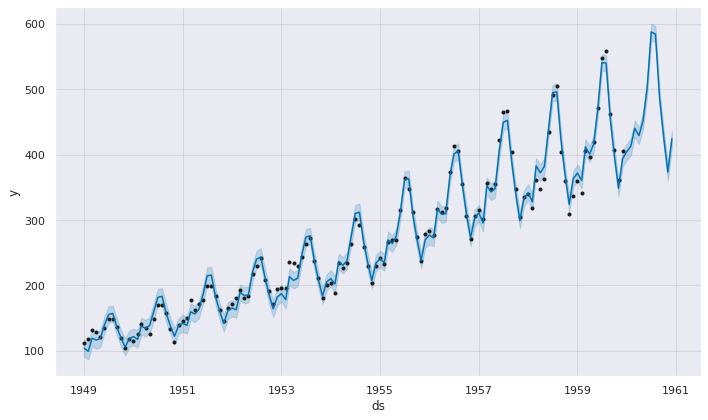

In [ ]:
modelo_profeta_treinado.plot(resultado_profeta);

### Desafio 13 -Variar os parâmetros max_p(d,q) para verificar os efeitos no resultados

In [ ]:
# Realizado durante os códigos da aula, tanto que o meu modelo autoarima foi
#melhor que o utilizado na aula

### Desafio 14 - Testar vários parâmetros para os dados de passageiros

In [ ]:
modelo_autoarima_pass = auto_arima(dados_pass_treino['y'], error_action= 'ignore',
                                  trace = True, seasonal = True, m = 12,
                                   start_p= 3, max_p = 12,
                                   start_d = 1, max_d = 2,
                                   start_q = 3, max_q = 12)


Performing stepwise search to minimize aic
 ARIMA(3,0,3)(1,1,1)[12] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.10 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.28 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.55 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.15 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.37 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [ ]:
previsao_autoarima_pass = modelo_autoarima_pass.predict(n_periods=12)
previsao_autoarima_pass

array([419.967172  , 399.84985049, 457.99438118, 444.47415565,
       464.78917863, 514.12544051, 587.8041693 , 597.01082232,
       499.53126876, 442.35967856, 396.41021685, 438.65159514])

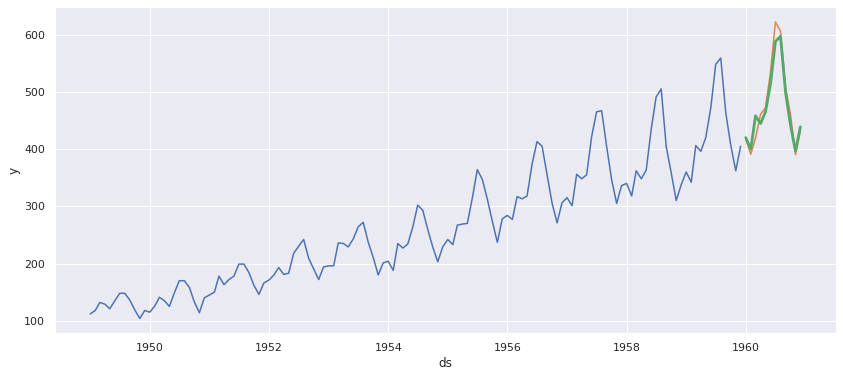

In [ ]:
plt.figure(figsize = (14,6))
dados_pass_teste['previsao_autoarima'] = previsao_autoarima_pass
sns.lineplot(data = dados_pass_treino, x = 'ds', y = 'y')
sns.lineplot(data = dados_pass_teste, x = 'month', y = 'passengers')
sns.lineplot(data = dados_pass_teste, x = 'month', y = 'previsao_autoarima',lw=2.8)

In [ ]:
resultado_autoprevisao = mean_squared_error(y_true=dados_pass_teste['passengers'], 
                   y_pred= dados_pass_teste['previsao_autoarima'])
resultado_previsao = mean_squared_error(y_true=dados_pass_teste['passengers'], 
                   y_pred= dados_pass_teste['previsao'])

print('Taxa de erro AUTOARIMA: {}\nTaxa de erro ARIMA: {}'.format(resultado_autoprevisao,resultado_previsao))

Taxa de erro AUTOARIMA: 343.6006816829735
Taxa de erro ARIMA: 3275.3720563915035


### Desafio 15 - Plotar os valores reais e valores previstos pelo ¨profeta¨. Fazer a mesma análise para os dados de tuberculose e compartilhar os resultado.

In [ ]:
modelo_profeta_tuberculose = Prophet(seasonality_mode="multiplicative")

In [ ]:
#dados_treino.reset_index(inplace = True)
#dados_treino.rename(columns = {"data":'ds','casos':'y'}, inplace = True)
modelo_tuber_treinado = modelo_profeta_tuberculose.fit(dados_treino[['ds', 'y']])


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = modelo_tuber_treinado.make_future_dataframe(periods=12, freq = "M")

In [ ]:
resultado_profeta_tuber = modelo_tuber_treinado.predict(future)

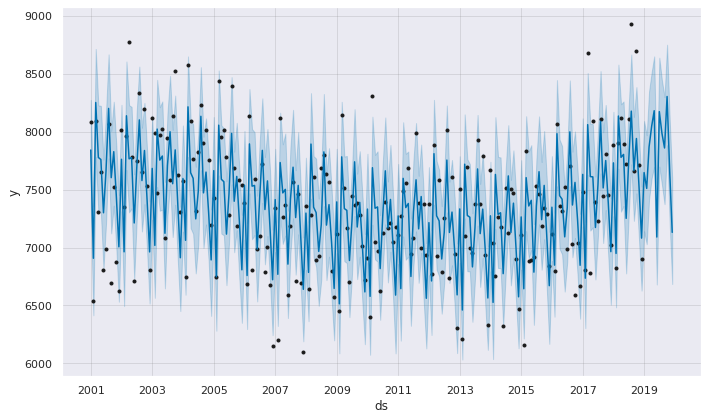

In [ ]:
modelo_tuber_treinado.plot(resultado_profeta_tuber);

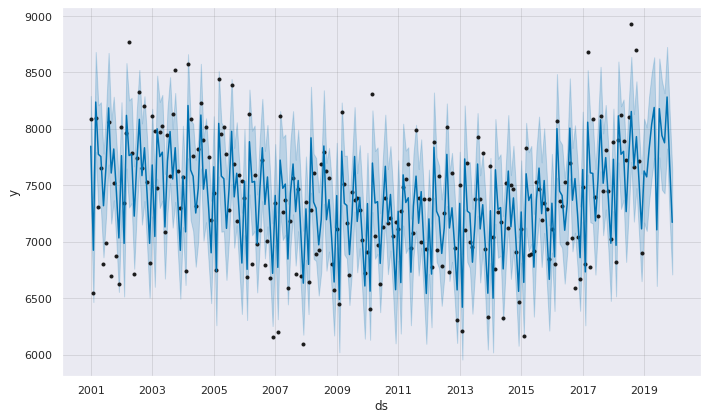

In [ ]:
modelo_tuber_treinado.plot(resultado_profeta_tuber);

### Desafio Extra - Neste módulo passamos por muitos conteúdos, para se aprofundar recomendo que pesquise mais sobre os assuntos abordados para consolidar ainda mais seus conhecimentos. Não deixe de ler e explorar mais a biblioteca prophet que é muita rica de conteúdo.